# Project 3: Model Assesment and Validation

Re-implement the example in section 7.10.2 using any simple, out of the box classifier (like K nearest neighbors from sci-kit). Reproduce the results for the incorrect and correct way of doing cross-validation.

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

# Parameters
N = 50  # Number of samples
p = 5000  # Number of predictors
np.random.seed(42)  # For reproducibility

# Generate synthetic dataset
X = np.random.randn(N, p)  # Independent standard Gaussian predictors
y = np.array([0] * (N // 2) + [1] * (N // 2))  # Binary class labels
np.random.shuffle(y)

# Incorrect cross-validation approach
def incorrect_cross_validation(X, y, num_selected_predictors=100):
    selected_predictors_idx = np.argsort([np.corrcoef(X[:, i], y)[0, 1] for i in range(p)])[-num_selected_predictors:]
    X_selected = X[:, selected_predictors_idx]

    kf = KFold(n_splits=5, shuffle=True)
    errors = []

    for train_index, test_index in kf.split(X_selected):
        X_train, X_test = X_selected[train_index], X_selected[test_index]
        y_train, y_test = y[train_index], y[test_index]

        model = KNeighborsClassifier(n_neighbors=1)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        errors.append(1 - accuracy_score(y_test, y_pred))

    return errors

# Correct cross-validation approach
def correct_cross_validation(X, y, num_selected_predictors=100):
    kf = KFold(n_splits=5, shuffle=True)
    errors = []

    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        selected_predictors_idx = np.argsort([np.corrcoef(X_train[:, i], y_train)[0, 1] for i in range(p)])[-num_selected_predictors:]
        X_train_selected = X_train[:, selected_predictors_idx]
        X_test_selected = X_test[:, selected_predictors_idx]

        model = KNeighborsClassifier(n_neighbors=1)
        model.fit(X_train_selected, y_train)
        y_pred = model.predict(X_test_selected)
        errors.append(1 - accuracy_score(y_test, y_pred))

    return errors

# Running the simulations
num_simulations = 50
incorrect_errors = []
correct_errors = []

for _ in range(num_simulations):
    incorrect_errors.extend(incorrect_cross_validation(X, y))
    correct_errors.extend(correct_cross_validation(X, y))

print(f"Average Incorrect Cross-Validation Error: {np.mean(incorrect_errors) * 100:.2f}%")
print(f"Average Correct Cross-Validation Error: {np.mean(correct_errors) * 100:.2f}%")


Average Incorrect Cross-Validation Error: 6.00%
Average Correct Cross-Validation Error: 60.00%


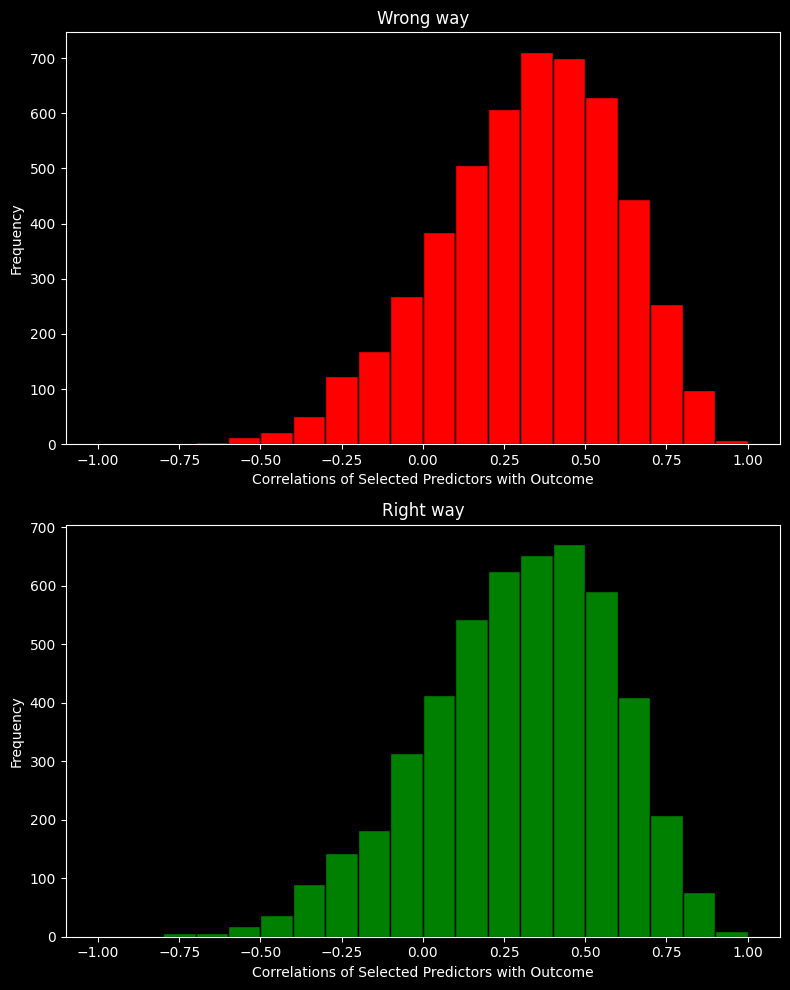

In [25]:
# Plotting the histograms of correlations
# Incorrect cross-validation approach
selected_predictors_idx_incorrect = np.argsort([np.corrcoef(X[:, i], y)[0, 1] for i in range(p)])[-100:]
X_selected_incorrect = X[:, selected_predictors_idx_incorrect]

correlations_incorrect = []
for _ in range(num_simulations):
    random_samples = np.random.choice(N, 10, replace=False)
    correlations_incorrect.extend([np.corrcoef(X_selected_incorrect[random_samples, i], y[random_samples])[0, 1] for i in range(100)])

# Correct cross-validation approach
correlations_correct = []
for _ in range(num_simulations):
    random_samples = np.random.choice(N, 40, replace=False)
    X_train = X[random_samples]
    y_train = y[random_samples]
    selected_predictors_idx_correct = np.argsort([np.corrcoef(X_train[:, i], y_train)[0, 1] for i in range(p)])[-100:]
    X_selected_correct = X[:, selected_predictors_idx_correct]
    random_samples_test = np.random.choice(N, 10, replace=False)
    correlations_correct.extend([np.corrcoef(X_selected_correct[random_samples_test, i], y[random_samples_test])[0, 1] for i in range(100)])

# Plotting the histograms
fig, axes = plt.subplots(2, 1, figsize=(8, 10))

# Incorrect cross-validation histogram
axes[0].hist(correlations_incorrect, bins=20, range=(-1.0, 1.0), color='red', edgecolor='black')
axes[0].set_title('Wrong way')
axes[0].set_xlabel('Correlations of Selected Predictors with Outcome')
axes[0].set_ylabel('Frequency')

# Correct cross-validation histogram
axes[1].hist(correlations_correct, bins=20, range=(-1.0, 1.0), color='green', edgecolor='black')
axes[1].set_title('Right way')
axes[1].set_xlabel('Correlations of Selected Predictors with Outcome')
axes[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()
